<a href="https://colab.research.google.com/github/udz2002/applied-data-science/blob/main/ADS1_Tutorial_3_0__Data_Cleaning_and_Reading_Errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science 1 : Tutorial 3

# PART 1:  Data Cleaning with Panda and Plotting
In the real world, most data you will encounter is messy and noisy and almost certainly not formatted in a way you might want.
Let's take a look at some examples.

Download **WB_Population.csv** dataset from BB and import into Google Colab

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# READ in the csv file using Panda library
df_pop = pd.read_csv('WB_population.csv')
# Find out how many rows and columns in this file
print(df_pop.shape)
# Find out the first 5 rows
print(df_pop.head())

(266, 68)
                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2014         2015         2016         2017  \
0      

Looks like we have a lot of years as columns, and a few unhelpful columns.

In [21]:
df_pop = pd.read_csv('WB_population.csv')
# changing the index column to "Country Name" if you didn't do that in the read_csv
df_pop.set_index('Country Name', inplace=True)
# dropping uninteresting columns
df_pop.drop(columns=['Indicator Name', 'Indicator Code', 'Country Code'], inplace=True)
# dropping missing values, default is rows (axis=0) and how='any'
df_pop.dropna(axis=1, how='all', inplace=True)
df_pop.head()
print(df_pop.shape)

(266, 63)


In [5]:
df_popT = df_pop.T  # or df_pop.transpose(). What did you observe when the dataframe transpose()?
# looking at the index now of the new df
print(df_popT.index)
# convert those strings into something numerical
df_popT.index = pd.to_numeric(df_popT.index)
print(df_popT.index)
# set the year index to be a datetime object instead
df_popT.index = pd.to_datetime(df_popT.index, format='%Y')
print(df_popT.index)
# a population should not be a float
for col in df_popT.columns:
    df_popT[col] = df_popT[col].astype(int, errors='ignore')
df_popT.head()

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')
Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022],
   

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960-01-01,54608,130692579,8622466,97256290,5357195,1608800,9443,93359407,133426,20349744,...,32500,32718461,64608,3031474234,113335,947000,5542459,16520441,3119430,3806310
1961-01-01,55811,134169237,8790140,99314028,5441333,1659800,10216,95760348,140984,20680653,...,34300,33621982,66462,3072421801,116820,966000,5646668,16989464,3219451,3925952
1962-01-01,56682,137835590,8969047,101445032,5521400,1711319,11014,98268683,148877,21020359,...,35000,34533889,68391,3126849612,120163,994000,5753386,17503133,3323427,4049778
1963-01-01,57475,141630546,9157465,103667517,5599827,1762621,11839,100892507,157006,21364017,...,39800,35526727,70400,3193428894,123416,1022000,5860197,18042215,3431381,4177931
1964-01-01,58178,145605995,9355514,105959979,5673199,1814135,12690,103618568,165305,21708487,...,40800,36509166,72493,3260441925,126582,1050000,5973803,18603097,3542764,4310332


Note we would have to modify this if some of our columns should not be integers.
The errors='ignore' is because there are some NaN values within the dataset.
Let's look at a subset of this data.

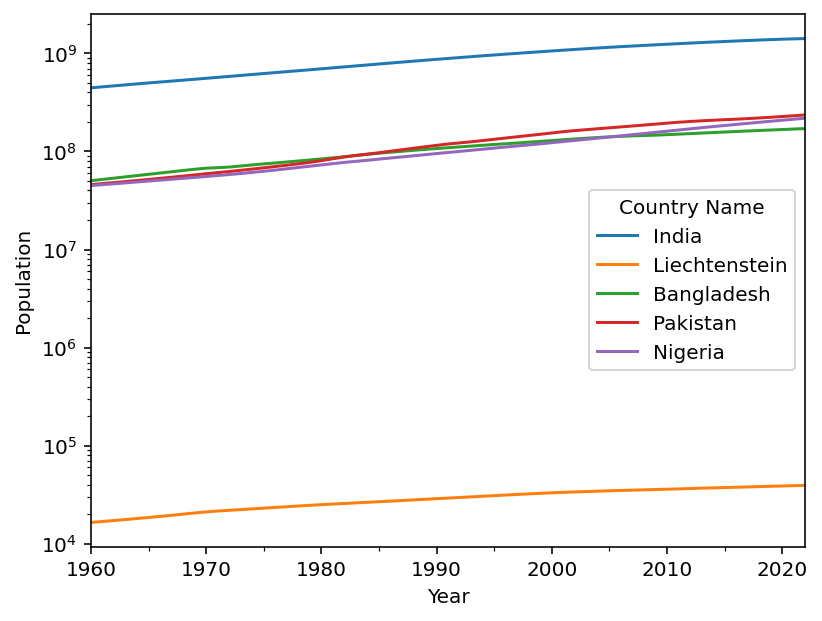

In [25]:
df_sub = df_popT[["India", "Liechtenstein", "Bangladesh", "Pakistan", "Nigeria"]].copy()
fig, ax = plt.subplots(dpi=144)
df_sub.plot(ax=ax, xlabel='Year', logy=True, ylabel='Population')
plt.show()


In [7]:
print(df_sub.loc['2013':], end='\n\n')
print(df_sub.iloc[-10:], end='\n\n')
print(df_sub.tail(10), end='\n\n')

print(df_sub.sample(frac=1).head())

Country Name       India  Liechtenstein  Bangladesh   Pakistan    Nigeria
2013-01-01    1291132063          36806   154030139  205337562  174726123
2014-01-01    1307246509          37096   155961299  208251628  179379016
2015-01-01    1322866505          37355   157830000  210969298  183995785
2016-01-01    1338636340          37609   159784568  213524840  188666931
2017-01-01    1354195680          37889   161793964  216379655  193495907
2018-01-01    1369003306          38181   163683958  219731479  198387623
2019-01-01    1383112050          38482   165516222  223293280  203304492
2020-01-01    1396387127          38756   167420951  227196741  208327405
2021-01-01    1407563842          39039   169356251  231402117  213401323
2022-01-01    1417173173          39327   171186372  235824862  218541212

Country Name       India  Liechtenstein  Bangladesh   Pakistan    Nigeria
2013-01-01    1291132063          36806   154030139  205337562  174726123
2014-01-01    1307246509          370

# PART 1:Exercise 1
Take the **`access_electric`** file, restructuring to **only have the years** (as a datetime object) as the index and **country names** as the columns.
Are the percentages in the dataframe an appropriate data type?
There should no be columns with only NaN values.
Then, extract just the BRICS countries (Brazil, Russia, India, China and South Africa) as a subset dataframe, make an appropriate line plot then print the rows from 2000-2020.

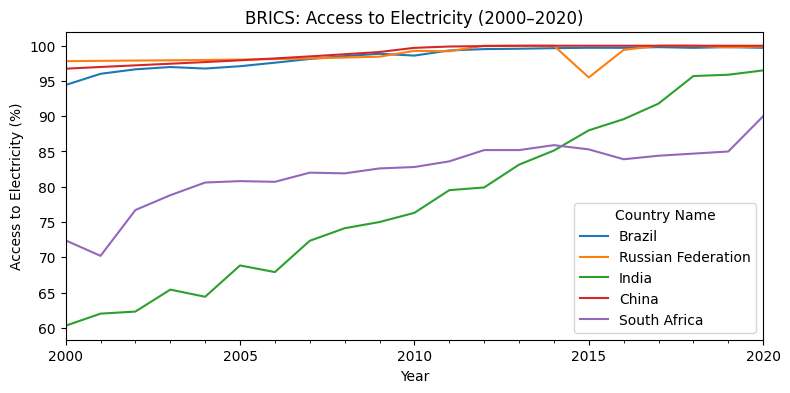

Country Name     Brazil  Russian Federation      India       China  \
Year                                                                 
2000-01-01    94.431412           97.806648  60.292839   96.745056   
2001-01-01    96.016528           97.855209  62.005440   96.985313   
2002-01-01    96.652996           97.895218  62.300000   97.217018   
2003-01-01    96.980098           97.933685  65.412010   97.447189   
2004-01-01    96.765107           97.977623  64.400000   97.682831   
2005-01-01    97.093513           98.034035  68.840454   97.930939   
2006-01-01    97.594314           98.109703  67.900000   98.198303   
2007-01-01    98.125382           98.206207  72.340714   98.486504   
2008-01-01    98.526625           98.319931  74.118492   98.791939   
2009-01-01    98.856938           98.447052  75.000000   99.110756   
2010-01-01    98.600000           99.268158  76.300000   99.700000   
2011-01-01    99.328691           99.209480  79.516785   99.887207   
2012-01-01    99.519

In [10]:
# find the file name and write the remaining codes
#  Read and clean
df_electric = pd.read_csv('access_electric.csv')
# # use Country Name as row labels
df_electric.set_index('Country Name' , inplace=True)
# # drop non-year columns if present + fully empty rows/cols
df_electric.drop(columns=['Country Code' , 'Indicator Name' , 'Indicator Code'], errors='ignore', inplace=True)
df_electric.dropna(axis=1, how='all', inplace=True)
df_electric.dropna(axis=0, how='all', inplace=True)

# 2) Restructure so YEARS are the index and COUNTRIES are columns
df_electric = df_electric.T
df_electric.index = pd.to_datetime(df_electric.index, format='%Y', errors='coerce')
df_electric.index.name = 'Year'
df_brics = df_electric.loc[~df_electric.index.isna()]

#Plot the df.brics "Year" vs "Access to Electricity (%)"
brics = ['Brazil','Russian Federation','India','China','South Africa']
present = [c for c in brics if c in df_electric.columns]       # handle name mismatches safely
df_brics = df_electric[present].copy()

# 4) Plot (years 2000–2020) ----------------------------------------------------
ax = df_brics.loc['2000':'2020'].plot(
    figsize=(9,4), xlabel='Year', ylabel='Access to Electricity (%)',
    title='BRICS: Access to Electricity (2000–2020)'
)
plt.show()

# 5) Print the rows from 2000–2020 --------------------------------------------
print(df_brics.loc['2000':'2020'])
print(df_electric.columns.tolist()[:30])

## End PART1: Exercise 1
Let's now look at some noisier, higher frequency time series data.
Load in the file "ftse.index.csv"

In [11]:
df_ftse = pd.read_csv('FTSE100_2022.csv', index_col='Date')
df_ftse.index = pd.to_datetime(df_ftse.index, format="%d/%m/%y")
df_ftse.sort_index(inplace=True)

In [12]:
def plot_ftse(df):
    """
    Plots the FTSE index
    """
    plt.figure(dpi=144)

    plt.step(df.index, df.Close)

    plt.xlabel('Date [year]')
    plt.ylabel('FTSE')
    plt.show()
    return

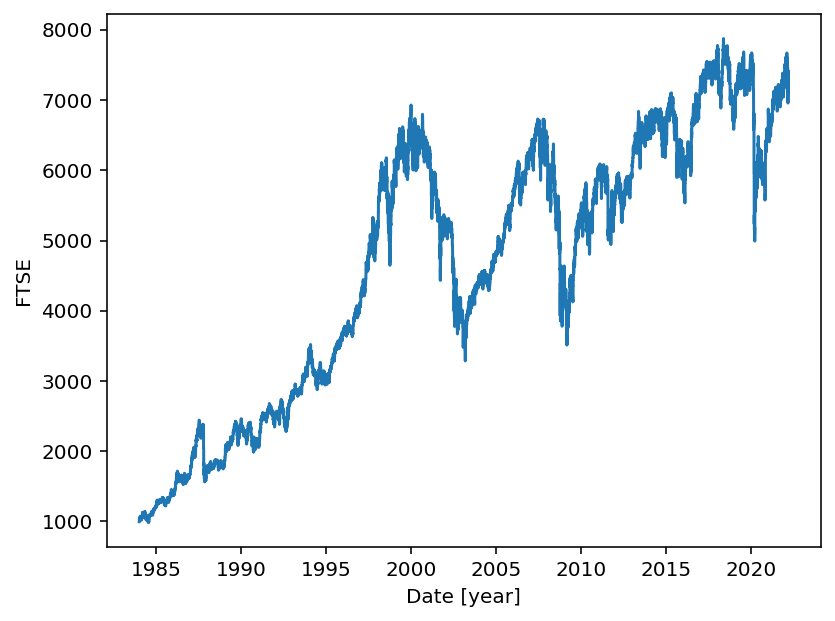

In [13]:
plot_ftse(df_ftse)

We saw this previously. There are a lot of ups and downs on day-to-day trades, so we might be more interested in a *moving average*. There are a few ways of doing this, but we will focus here on a simple moving average and an exponential moving average (which is typically used in finance).

In [14]:
# Simple Moving Average, monthly and yearly
df_ftse['Monthly Close'] = df_ftse.Close.rolling('30D', center=True).mean()
df_ftse['Yearly Close'] = df_ftse.Close.rolling('365D', center=True).mean()

# Exponential Moving Average, 7-day hold
df_ftse['Weekly Close'] = df_ftse.Close.ewm(halflife=3.5).mean()

In [15]:
def plot_ftse_averaged(df):
    """
    Plots the FTSE index
    """
    fig, axs = plt.subplots(3, dpi=144, sharey=True)
    axs = axs.flatten()

    colours = ('red', 'green', 'blue')
    for i, col in enumerate(df.columns[1:]):
        axs[i].step(df.index, df.Close, label='Close', color='k')
        axs[i].step(df.index, df[col], label=col, color=colours[i])
        axs[i].legend()
        if i < 2:
            axs[i].set_xticklabels([])

    fig.subplots_adjust(hspace=0)
    fig.supxlabel('Date [year]')
    fig.supylabel('FTSE')
    plt.show()
    return

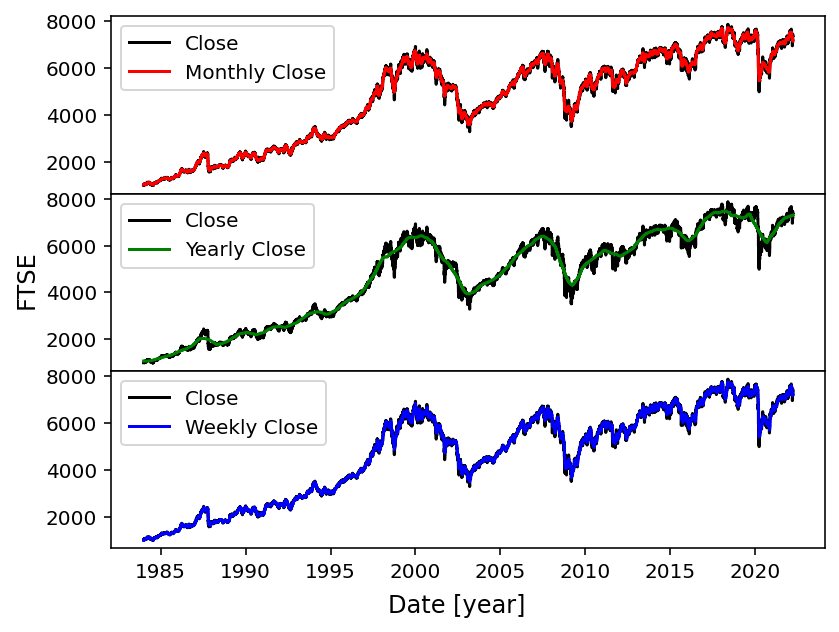

In [16]:
plot_ftse_averaged(df_ftse)

What about if we had missing data in our series?
Let's look at masking data (useful if you want to remove things) and then interpolating.

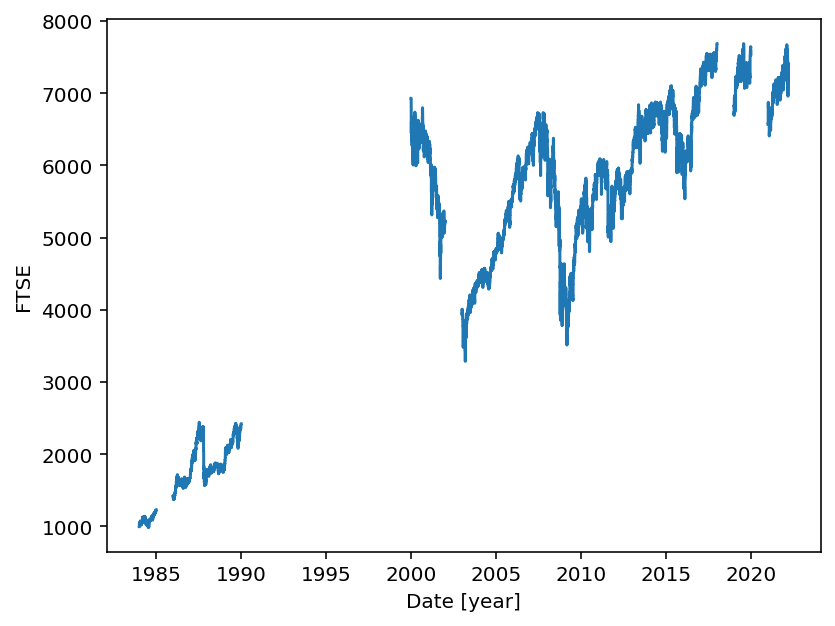

In [17]:
df_ftse_cut = df_ftse.copy()

# delete 6 random years with a mask
unique_years = df_ftse_cut.index.to_period('Y').unique()
selected_years = np.random.choice(unique_years, 6, replace=False)
df_ftse_cut = df_ftse_cut.apply(lambda row: row if row.name.to_period('Y') not in selected_years else np.nan, axis=1)

# Mask out the 90s for a big missing chunk
df_ftse_cut.loc[(df_ftse.index > '1990') & (df_ftse.index < '2000')] = np.nan
plot_ftse(df_ftse_cut)

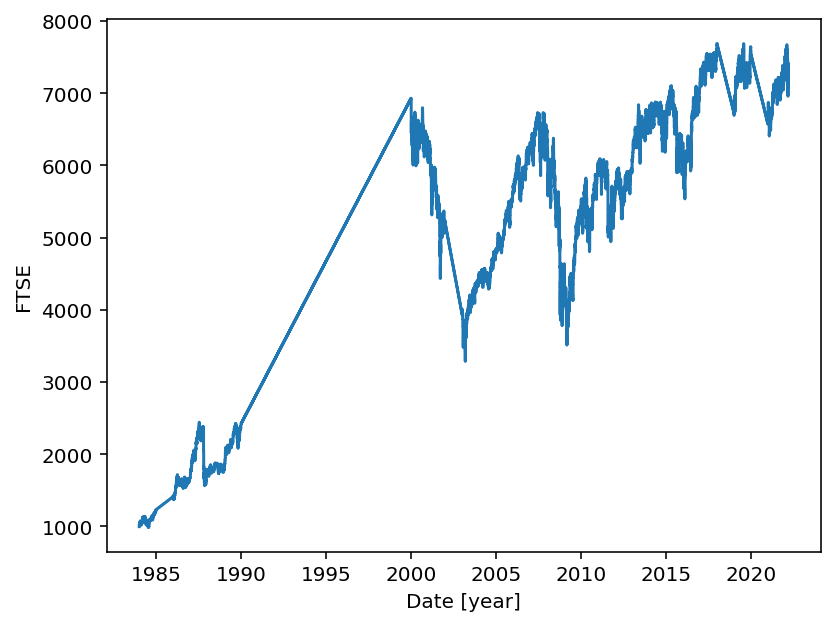

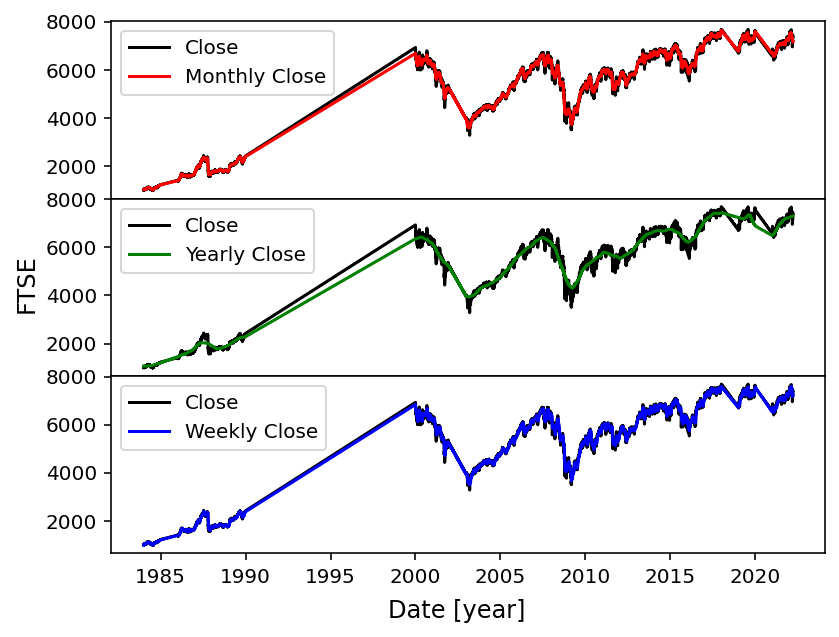

In [18]:
# linearly interpolating, which is not the same as fitting
df_ftse_interp = df_ftse_cut.interpolate()
plot_ftse(df_ftse_interp)
plot_ftse_averaged(df_ftse_interp)

# Part 1:Exercise 2
Delete 10 random years (not 10 in a row) from the `df_pop` dataframe we made earlier.
Interpolate over this dataframe and plot a decadal simple moving average for the European Union.

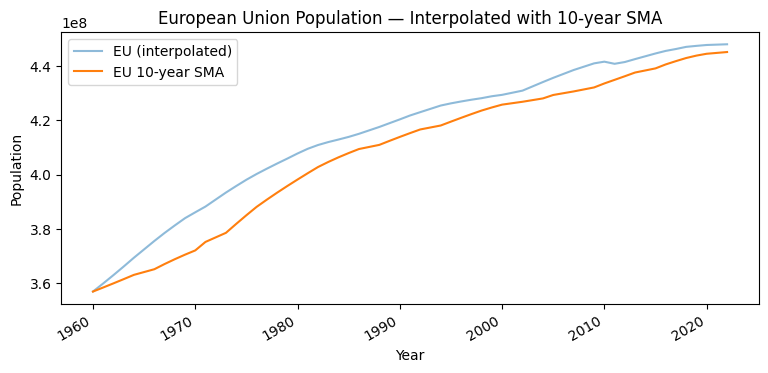

Dropped years: [Timestamp('1965-01-01 00:00:00'), Timestamp('1972-01-01 00:00:00'), Timestamp('1987-01-01 00:00:00'), Timestamp('1993-01-01 00:00:00'), Timestamp('2001-01-01 00:00:00'), Timestamp('2003-01-01 00:00:00'), Timestamp('2006-01-01 00:00:00'), Timestamp('2008-01-01 00:00:00'), Timestamp('2014-01-01 00:00:00'), Timestamp('2021-01-01 00:00:00')]


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Use the years-indexed population frame ---
# If you already have df_popT from earlier (years as DatetimeIndex, countries as columns), use it.
# Otherwise, build it quickly from df_pop:
try:
    df_years = df_popT.copy()
except NameError:
    df_years = (df_pop
                .set_index('Country Name')
                .drop(columns=['Indicator Name','Indicator Code','Country Code'], errors='ignore')
                .dropna(axis=1, how='all')
                .T)
    df_years.index = pd.to_datetime(df_years.index, format='%Y', errors='coerce')
    df_years = df_years.loc[df_years.index.notna()].sort_index()

# --- 1) Delete 10 random (non-adjacent) years ---
rng = np.random.default_rng(42)  # set a seed for reproducibility; change/remove if you want different years
years = df_years.index.to_numpy()

to_drop = []
while len(to_drop) < 10:
    y = years[rng.integers(0, len(years))]
    # ensure the chosen year is not adjacent to any already chosen
    if all(abs((pd.Timestamp(y) - pd.Timestamp(d)).days) > 370 for d in to_drop):
        to_drop.append(pd.Timestamp(y))

df_pop_cut = df_years.drop(index=to_drop).sort_index()

# --- 2) Interpolate missing years (time-based) ---
df_interp = df_pop_cut.interpolate(method='time')

# --- 3) 10-year simple moving average for the European Union ---
# Be robust to different EU column names in World Bank data
eu_candidates = [c for c in df_interp.columns if c.startswith('European Union')]
if not eu_candidates:
    raise KeyError("Couldn't find an 'European Union' column. Check df_interp.columns for the exact name.")
eu_col = eu_candidates[0]

eu_ma10 = df_interp[eu_col].rolling(window=10, min_periods=1).mean()

# --- 4) Plot ---
ax = df_interp[eu_col].plot(figsize=(9,4), alpha=0.5, label='EU (interpolated)')
eu_ma10.plot(ax=ax, label='EU 10-year SMA')

plt.title('European Union Population — Interpolated with 10-year SMA')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

# (optional) See which years were removed:
print("Dropped years:", sorted(pd.to_datetime(to_drop)))


## End of PART1: Exercise 2

## PART 2: Python Reading errors
You have probably already encountered many errors in your python coding.
One of the most important skills in coding is being able to anticipate, understand and handle errors.

In [19]:
# Missing colon at the end of the if statement
if True
    print("This will cause a SyntaxError")

SyntaxError: expected ':' (ipython-input-229022413.py, line 2)

In [ ]:
with open('notafile', 'r') as f:
    f.readlines()

In [ ]:
# Using an undefined variable
print(undeclared_variable)

In [ ]:
# Adding a string and an integer
result = "Age: " + 25

In [ ]:
# Accessing an out-of-range index in a list
my_list = [1, 2, 3]
print(my_list[3])

In [ ]:
my_dict = {'name': 'Alice'}
print(my_dict['age'])

In [ ]:
# Trying to call a non-existent method of an object
"hello".non_existent_method()

In [ ]:
# Converting a string to an integer where it's not possible
int("this is not a number")

In [ ]:
# Division by zero
result = 10 / 0

## End of PART2